# todo
x continuous integration
x update example notebook
x prop decrase for both
x make sure multiprocessing works
x write documentation
- blog post
- update pip
- update release

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import IPython
from scipy.io import wavfile
import noisereduce as nr
import soundfile as sf
from noisereduce.generate_noise import band_limited_noise
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import io
%matplotlib inline

### load data

In [3]:
url = "https://auditoryneuroscience.com/sites/default/files/bushOffersPeace.ogg"
response = urllib.request.urlopen(url)
data, rate = sf.read(io.BytesIO(response.read()))

In [4]:
len(data),rate

(200542, 44100)

### add noise

In [5]:
noise_len = 2 # seconds
noise = band_limited_noise(min_freq=2000, max_freq = 12000, samples=len(data), samplerate=rate)*5
noise_clip = noise[:rate*noise_len]
audio_clip_band_limited = data+noise

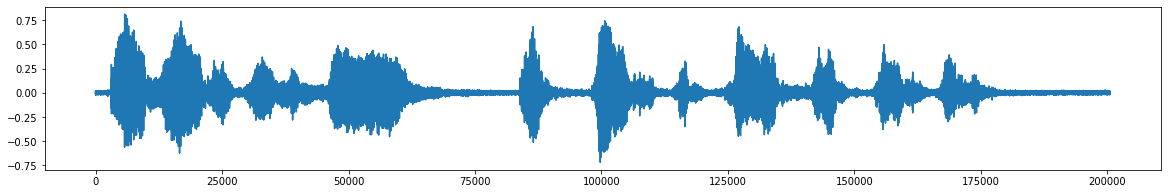

In [6]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_band_limited)

In [7]:
from noisereduce.noisereduce import reduce_noise

In [14]:
reduced_noise = reduce_noise(y = audio_clip_band_limited, sr=rate, thresh_n_mult_nonstationary=2,stationary=False)

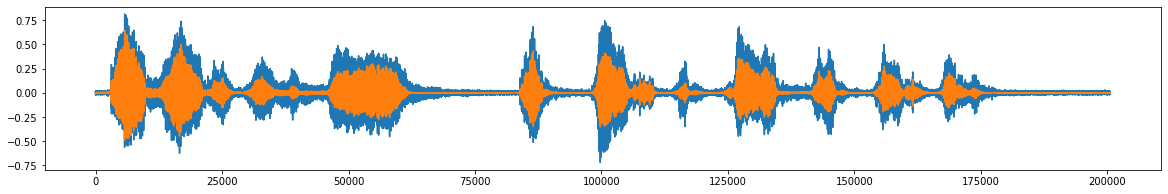

In [15]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_band_limited)
ax.plot(reduced_noise)

In [16]:
IPython.display.Audio(data=reduced_noise, rate=rate)

### stationary noise reduction

In [11]:
IPython.display.Audio(data=audio_clip_band_limited, rate=rate)

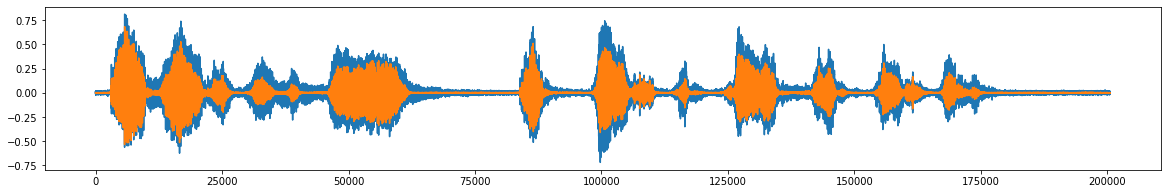

In [12]:
reduced_noise = reduce_noise(y = audio_clip_band_limited, sr=rate, stationary=True, chunk_size=600000, n_std_thresh_stationary=1)

fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_band_limited)
ax.plot(reduced_noise)

### stationary noise reduction

In [13]:
IPython.display.Audio(data=reduced_noise, rate=rate)

### Cafe Noise

In [17]:
url = "https://raw.githubusercontent.com/timsainb/noisereduce/master/assets/cafe_short.wav"
response = urllib.request.urlopen(url)
noise_data, noise_rate = sf.read(io.BytesIO(response.read()))

In [18]:
snr = 2 # signal to noise ratio
noise_clip = noise_data/snr
audio_clip_cafe = data + noise_clip

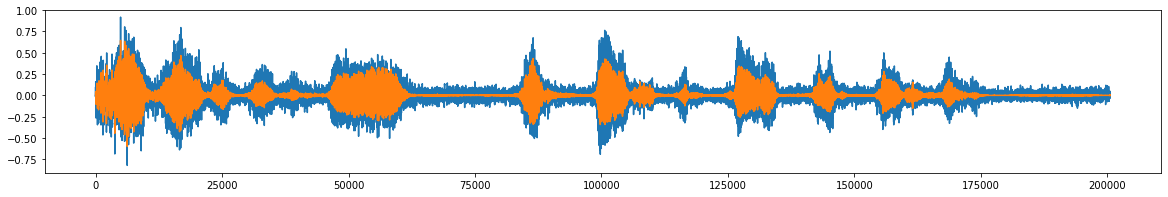

In [20]:
reduced_noise = reduce_noise(y = audio_clip_cafe, sr=rate, stationary=True, chunk_size=600000, n_std_thresh_stationary=1)

fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_cafe)
ax.plot(reduced_noise)

### stationary noise reduction

In [21]:
import librosa

In [29]:
noise_spec = librosa.power_to_db(np.abs(librosa.stft(
    audio_clip_cafe, 
))**2, ref=np.max)
recovered_spec = librosa.power_to_db(np.abs(librosa.stft(
    reduced_noise, 
))**2, ref=np.max)

(0.0, 200542.0, -0.6624310103907655, 0.707427054779173)

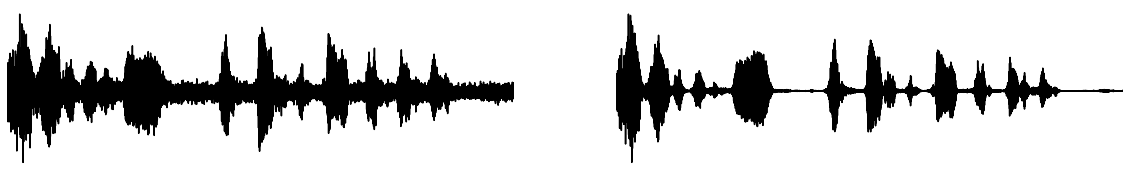

In [44]:
fig, axs = plt.subplots(ncols=2, figsize=(20,3))
axs[0].plot(audio_clip_cafe, color='k')
axs[1].plot(reduced_noise, color='k')
axs[0].set_xlim([0, len(audio_clip_cafe)])
axs[1].set_xlim([0, len(audio_clip_cafe)])
axs[0].axis('off')
axs[1].axis('off')

(-0.5, 391.5, -0.5, 299.5)

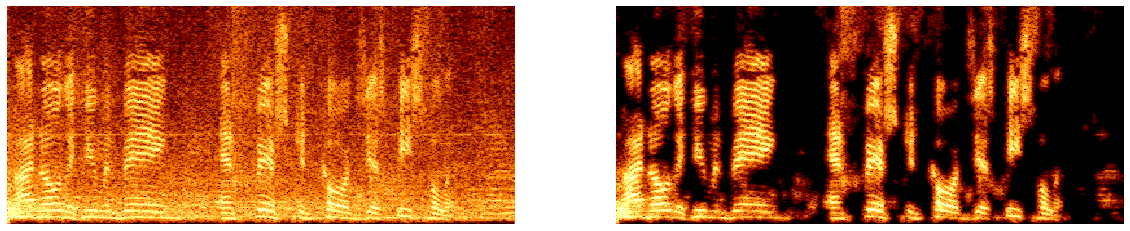

In [46]:
fig, axs = plt.subplots(ncols=2, figsize=(20,4))
axs[0].matshow(noise_spec[:300], origin='lower', aspect='auto', cmap = plt.cm.afmhot)
axs[1].matshow(recovered_spec[:300], origin='lower', aspect='auto', cmap = plt.cm.afmhot)
axs[0].axis('off')
axs[1].axis('off')